# Hoeffding inequality

## Problem 1
In problem 1 we take 1000 fair coins and toss each 10 times. We record the number of heads for each of the coins. The number of heads has a [binomial distribution](https://youtu.be/rLgzukngOEg) . Python's numpy library has a builtin function for this called [numpy.random.binomial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html) . Let's toss 7 coins to see how the function works:  

In [1]:
import numpy as np

tosses = 10
prob_head = 0.5
num_coins = 7

heads = np.random.binomial(tosses, prob_head, num_coins)
print(heads)

[5 6 3 5 5 7 4]


The problem actually asks us to record the frequency $\nu$ of heads in 10 tosses, e.g. if you had 3 heads among the 10 tosses, then the frequency you record is $\nu = 0.3$ . So let us divide the values by 10 to get frequencies:

In [2]:
heads_nu = heads / tosses
print(heads_nu)

[ 0.5  0.6  0.3  0.5  0.5  0.7  0.4]


The problem further asks us to focus on three coins, namely the first, a random one and the coin with the lowest number of heads:

In [3]:
import random

print("First coin: nu_1 = ", heads_nu[0])
print("Random coin: nu_rand = ", random.choice(heads_nu))
print("Coin with least number of heads: nu_min = ", min(heads_nu))

First coin: nu_1 =  0.5
Random coin: nu_rand =  0.6
Coin with least number of heads: nu_min =  0.3


Finally, we are interested in the average frequency $\nu_{\text{min}}$ , e.g. let's take the average over 20 runs:

In [4]:
RUNS = 20
nu_min_avg = 0

for _ in range(RUNS):
    heads_nu = np.random.binomial(tosses, prob_head, num_coins) / 10
    nu_min = min(heads_nu)
    print(heads_nu, " , nu_min = ", nu_min)
    nu_min_avg += nu_min

nu_min_avg = nu_min_avg / RUNS
print("\nAverage value: nu_min_avg = ", nu_min_avg)

[ 0.6  0.4  0.6  0.7  0.7  0.5  0.7]  , nu_min =  0.4
[ 0.4  0.7  0.1  0.6  0.3  0.5  0.6]  , nu_min =  0.1
[ 0.6  0.4  0.5  0.6  0.3  0.5  0.7]  , nu_min =  0.3
[ 0.4  0.6  0.5  0.2  0.4  0.5  0.3]  , nu_min =  0.2
[ 0.5  0.6  0.4  0.3  0.5  0.6  0.3]  , nu_min =  0.3
[ 0.6  0.5  0.2  0.5  0.7  0.7  0.5]  , nu_min =  0.2
[ 0.6  0.3  0.5  0.5  0.4  0.7  0.4]  , nu_min =  0.3
[ 0.4  0.3  0.3  0.6  0.2  0.4  0.4]  , nu_min =  0.2
[ 0.3  0.5  0.3  0.4  0.6  0.6  0.4]  , nu_min =  0.3
[ 0.7  0.6  0.6  0.4  0.8  0.5  0.6]  , nu_min =  0.4
[ 0.2  0.5  0.4  0.6  0.3  0.2  0.3]  , nu_min =  0.2
[ 0.5  0.6  0.5  0.8  0.4  0.6  0.4]  , nu_min =  0.4
[ 0.6  0.6  0.7  0.2  0.7  0.3  0.3]  , nu_min =  0.2
[ 0.5  0.3  0.5  0.5  0.5  0.5  0.2]  , nu_min =  0.2
[ 0.5  0.7  0.6  0.8  0.3  0.6  0.2]  , nu_min =  0.2
[ 0.6  0.3  0.7  0.6  0.5  0.6  0.5]  , nu_min =  0.3
[ 0.5  0.3  0.6  0.6  0.4  0.3  0.5]  , nu_min =  0.3
[ 0.5  0.6  0.4  0.8  0.5  0.4  0.5]  , nu_min =  0.4
[ 0.5  0.6  0.7  0.7  0.6  0

For the homework problem we have 1000 fair coins, toss each 10 times and average over 100,000 runs to determine $\nu_{\text{min}}$. We can write this in compact form using a Python list comprehension (The calculation takes about 14 seconds):

In [5]:
import numpy as np
import random

tosses = 10
num_coins = 1000
prob_head = 0.5
RUNS = 10**5

#               mean(  minimum               (generate 1000 nu values  )                              )
nu_min_avg = np.mean( [min(np.random.binomial(tosses, prob_head, num_coins)/10) for _ in range(RUNS)] )
print("Average of nu_min over", RUNS, "runs: nu_min_avg = ", nu_min_avg)

Average of nu_min over 100000 runs: nu_min_avg =  0.037755


The value $\nu_{\text{min}}$ is close to zero. It means that when you take the minimum $\nu$ among the 1000 coins and repeat this over 100,000 runs, then the minimum value is often 0 (no heads in 10 tosses) .

*Note*: This emphasizes the example from the lecture . If you take 1000 students each tossing a fair coin 10 times, then the (surprisingly high) probability that at least one student gets 10 heads in a row is 62% .

## Problem 2

In problem 2 we are asked to check which of the three coins have a distribution $\nu$ that satisfies the single bin Hoeffding inequality. Let us start by taking 1000 coins, tossing each 10 times and repeating that experiment for 8000 runs . 

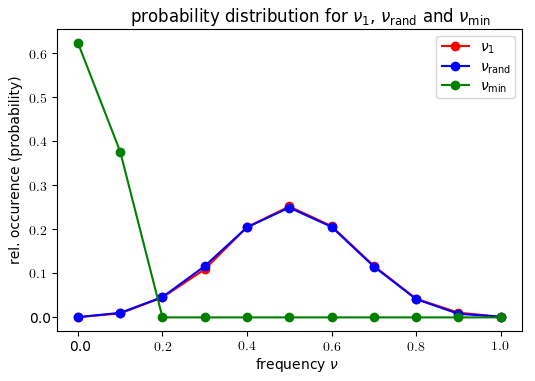

1.0
1.0
1.0


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math

# parameters
num_throws = 10
probability_head = 0.5
num_coins = 1000

# distribution arrays . nu can only take 11 values,
# namely 0, 0.1, 0.2, 0.3, ..., 1.0
dist_nu_1 = np.array(11 * [0])
dist_nu_rand = np.array(11 * [0])
dist_nu_min = np.array(11 * [0])


# create distribution of how many times a head occured among 10 tosses
RUNS = 8000

for i in range(RUNS):
    coins_1000 = np.random.binomial(num_throws, probability_head, num_coins)
    coin_1 = coins_1000[0]
    coin_rand = np.random.choice(coins_1000)
    coin_min = min(coins_1000)
    
    dist_nu_1[coin_1] += 1
    dist_nu_rand[coin_rand] += 1
    dist_nu_min[coin_min] += 1

    
# normalize distribution
dist_nu_1    = dist_nu_1    / RUNS
dist_nu_rand = dist_nu_rand / RUNS
dist_nu_min  = dist_nu_min  / RUNS

nu_list = [i/10 for i in range(11)]
    
fig1 = plt.figure(1, dpi = 100)
plt.plot(nu_list, dist_nu_1, '-ro', label = r'$\nu_1$')
plt.plot(nu_list, dist_nu_rand, '-bo', label = r'$\nu_{\mathrm{rand}}$')
plt.plot(nu_list, dist_nu_min, '-go', label = r'$\nu_{\mathrm{min}}$')

plt.legend()
plt.plot()
plt.title(r"probability distribution for $\nu_1$, $\nu_{\mathrm{rand}}$ and $\nu_{\mathrm{min}}$")
plt.xlabel(r"frequency $\nu$")
plt.ylabel("rel. occurence (probability)")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()
# fig1.savefig('probability_distribution_nu_1_rand_min.png')

# check if probabilities add to 1:
print(sum(dist_nu_1))
print(sum(dist_nu_rand))
print(sum(dist_nu_min))


We can see that the distributions for $\nu_1$ and $\nu_{\mathrm{rand}}$ are very similar . However, the distribution for $\nu_{\mathrm{min}}$ looks significantly different. Let's look at the values of the distribution for $\nu_{\mathrm{min}}$ :

In [7]:
print(dist_nu_min)

[ 0.6235  0.3765  0.      0.      0.      0.      0.      0.      0.      0.
  0.    ]


We can see that in 62% of the runs the minimum number of heads in 10 tosses is 0,
and in 38% of the runs the minimum number of heads in 10 tosses is 1.

We can also calculate the average value $\nu_{\mathrm{min}}$ from this distribution:

$P(\nu = \nu_{\mathrm{min}}) = P(\nu_{\mathrm{min}} = 0) \cdot 0.0 + P(\nu_{\mathrm{min}} = 1) \cdot 0.1 
= 0.63 * 0.0 + 0.37 *  0.1 = 0.037$ 

Note: There it is again, the value of 63% from the lecture.

## Plotting the Hoeffding inequality

Now, let's finally plot the Hoeffding inequality. This will show us which of the three distributions satisfy the single bin Hoeffding inequality.

The Hoeffding inequality is $P(|\mu - \nu|>\epsilon) \leq 2 \exp(-2 \epsilon^2N)$ . We want to check if it holds for every ϵ . For this we will create a plot. Let's first plot the right hand side **RHS of the Hoeffding inequality** :

$\text{hoeff}_\text{RHS} = 2 \exp(-2 \epsilon^2 N) = 2 \exp(-2 \epsilon^2 \cdot 10)$

where $N = 10$ is the number of coin tosses, or if you will the sample size (see also the lecture where a sample was a bunch of marbles that we grabbed from a bin).

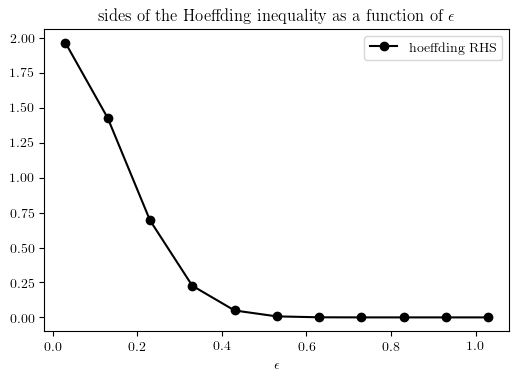

In [8]:
# right hand side RHS of Hoeffding inequality
def hoeffding(N, eps):
    return 2 * math.exp(-2 * eps * eps * N)

eps_list = [0.1 * i + 0.03 for i in range(0, 11)]           # add some offset 0.03 to avoid inaccuracy, e.g. 0.1 + 0.2 == 0.3
hoeffding_RHS = [hoeffding(10, eps) for eps in eps_list]    # is False in Python

fig2 = plt.figure(2, dpi = 100)
plt.plot(eps_list, hoeffding_RHS, '-ko', label = 'hoeffding RHS')
plt.title(r'sides of the Hoeffding inequality as a function of $\epsilon$')
plt.xlabel(r'\epsilon')
plt.legend()
plt.show()

Now, let's plot the **left hand side of the Hoeffding inequality** for $\nu_1$. Since we have a fair coin we have $\mu = 0.5$ .
Let's pick a value, e.g. ϵ = 0.13 . Then the left hand side of the Hoeffding inequality is:

$ P(|\mu - \nu| > 0.13) $

What is the meaning of this expression? Well, P(|μ−ν|>0.13) is the probability that we get a ν in our experiment that is more than 0.13 away from μ. 

Now, look at the probability distribution that we plotted earlier. The ν values that are more than 0.13 away from μ = 0.5 are: 

ν = 0.7, 0.8, 0.9, 1.0 and


ν = 0.3, 0.2, 0.1, 0.0

So the probability P(|μ−ν|>0.13) that we get a ν in our experiment that is more than 0.13 away from μ = 0.5 is computed as:

$ P(|\mu - \nu| > 0.13) = P(\nu = 0.7) + P(\nu = 0.8) + P(\nu = 0.9) + P(\nu = 1.0) + P(\nu = 0.3) + P(\nu = 0.2) + P(\nu = 0.1) + P(\nu = 0.0) $

Let's look at the distribution for $\nu_1$ again, the values were: 

In [9]:
for nu, rel_occurence in zip(nu_list, dist_nu_1):
    print("nu_1 = ", nu, "occured with probability P(nu_1 = ", nu, ") = ", rel_occurence)

nu_1 =  0.0 occured with probability P(nu_1 =  0.0 ) =  0.0005
nu_1 =  0.1 occured with probability P(nu_1 =  0.1 ) =  0.009125
nu_1 =  0.2 occured with probability P(nu_1 =  0.2 ) =  0.045375
nu_1 =  0.3 occured with probability P(nu_1 =  0.3 ) =  0.10925
nu_1 =  0.4 occured with probability P(nu_1 =  0.4 ) =  0.205
nu_1 =  0.5 occured with probability P(nu_1 =  0.5 ) =  0.252
nu_1 =  0.6 occured with probability P(nu_1 =  0.6 ) =  0.20725
nu_1 =  0.7 occured with probability P(nu_1 =  0.7 ) =  0.117
nu_1 =  0.8 occured with probability P(nu_1 =  0.8 ) =  0.042375
nu_1 =  0.9 occured with probability P(nu_1 =  0.9 ) =  0.01075
nu_1 =  1.0 occured with probability P(nu_1 =  1.0 ) =  0.001375


Adding the probabilities that we need yields:

In [10]:
eps = 0.13
mu = 0.5

prob_sum = 0
for nu, rel_occurence in zip(nu_list, dist_nu_1):           # recall that dist_nu_1 contains the relative occurences
    if abs(mu - nu) > eps:
        prob_sum += rel_occurence
        
print("P(|mu - nu|) > 0.13 = ", prob_sum)

P(|mu - nu|) > 0.13 =  0.33575


So, the probability that we get a $\nu_1$ that is more than $\epsilon = 0.13$ away from $\mu = 0.5$ is:

$P(|\mu - \nu_1| > \epsilon) \approx 0.34$

When we do this for several other $\epsilon$ values we can plot the left hand side of the Hoeffding inequality :

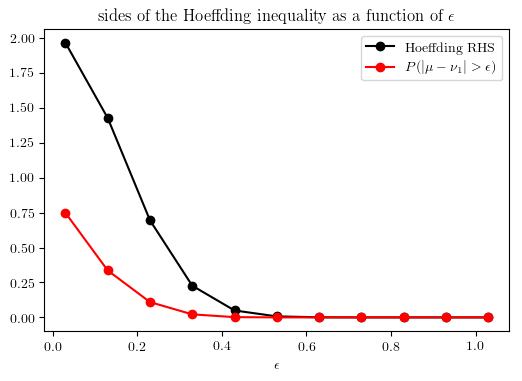

0


In [11]:
eps_list = [0.1 * i + 0.03  for i in range(0, 11)]

mu = 0.5
N = 10
hoeffding_RHS = [hoeffding(N, eps) for eps in eps_list]


# collect values for the left hand side of Hoeffding inequality for nu_1
hoeffding_LHS_nu_1 = []
for eps in eps_list:
    prob_sum = 0
    for nu, rel_occurence in zip(nu_list, dist_nu_1):           # recall that dist_nu_1 contains the relative occurences
        if abs(mu - nu) > eps:
            prob_sum += rel_occurence
    hoeffding_LHS_nu_1.append(prob_sum)


fig3 = plt.figure(3, dpi = 100)
plt.plot(eps_list, hoeffding_RHS, '-ko', label = 'Hoeffding RHS')
plt.plot(eps_list, hoeffding_LHS_nu_1, '-ro', label = r'$P(|\mu - \nu_1| > \epsilon)$')
plt.xlabel(r'\epsilon')
plt.title(r'sides of the Hoeffding inequality as a function of $\epsilon$')


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.legend()
plt.show()

# check if all values in hoeffding_LHS_nu_1 are less or equal than values in hoeffding_RHS
print( sum(np.array(hoeffding_LHS_nu_1) > np.array(hoeffding_RHS) ))

Let us have a look at the Hoeffding inequality for the distribution of $\nu_{\mathrm{min}}$ :

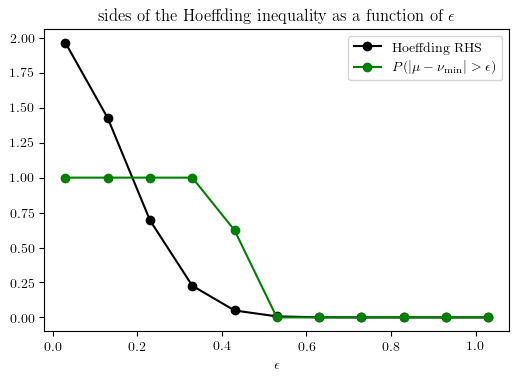

3


In [12]:
eps_list = [0.1 * i + 0.03  for i in range(0, 11)]

mu = 0.5
N = 10
hoeffding_RHS = [hoeffding(N, eps) for eps in eps_list]

# collect values for the left hand side of Hoeffding inequality for nu_min
hoeffding_LHS_nu_min = []
for eps in eps_list:
    prob_sum = 0
    for nu, rel_occurence in zip(nu_list, dist_nu_min):
        if abs(mu - nu) > eps:
            prob_sum += rel_occurence
    hoeffding_LHS_nu_min.append(prob_sum)


fig4 = plt.figure(4, dpi = 100)
plt.plot(eps_list, hoeffding_RHS, '-ko', label = 'Hoeffding RHS')
plt.plot(eps_list, hoeffding_LHS_nu_min, '-go', label = r'$P(|\mu - \nu_{\mathrm{min}}| > \epsilon)$')
plt.xlabel(r'\epsilon')
plt.title(r'sides of the Hoeffding inequality as a function of $\epsilon$')


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.legend()
plt.show()

# check if all values in hoeffding_LHS_nu_min are less or equal than values in hoeffding_RHS
print( sum(np.array(hoeffding_LHS_nu_min) > np.array(hoeffding_RHS) ))

We can see that the distribution for $\nu_{\mathrm{min}}$  does not satisfy the Hoeffding inequality . 

Let's use a higher resolution by choosing a smaller stepsize for $\epsilon$ :

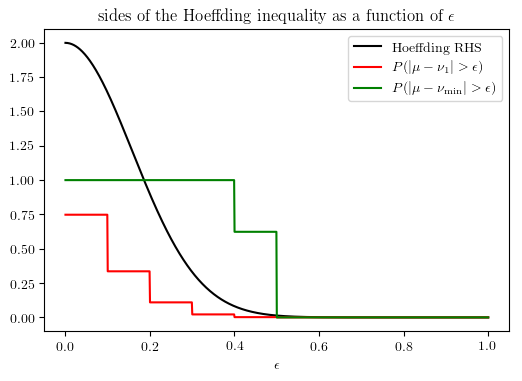

0
314


In [13]:
eps_list = [0.001 * i + 0.0003 for i in range(0, 1001)]

mu = 0.5
N = 10
hoeffding_RHS = [hoeffding(N, eps) for eps in eps_list]


# collect values for the left hand side of Hoeffding inequality for nu_1
hoeffding_LHS_nu_1 = []
for eps in eps_list:
    prob_sum = 0
    for nu, rel_occurence in zip(nu_list, dist_nu_1):           # recall that dist_nu_1 contains the relative occurences
        if abs(mu - nu) > eps:
            prob_sum += rel_occurence
    hoeffding_LHS_nu_1.append(prob_sum)

    
# collect values for the left hand side of Hoeffding inequality for nu_min
hoeffding_LHS_nu_min = []
for eps in eps_list:
    prob_sum = 0
    for nu, rel_occurence in zip(nu_list, dist_nu_min):
        if abs(mu - nu) > eps:
            prob_sum += rel_occurence
    hoeffding_LHS_nu_min.append(prob_sum)


fig5 = plt.figure(5, dpi = 100)
plt.plot(eps_list, hoeffding_RHS, '-k', label = 'Hoeffding RHS')
plt.plot(eps_list, hoeffding_LHS_nu_1, '-r', label = r'$P(|\mu - \nu_1| > \epsilon)$')
plt.plot(eps_list, hoeffding_LHS_nu_min, '-g', label = r'$P(|\mu - \nu_{\mathrm{min}}| > \epsilon)$')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.title(r'sides of the Hoeffding inequality as a function of $\epsilon$')
plt.xlabel(r'$\epsilon$')

plt.legend()
plt.show()

# fig5.savefig('hoeffding_inequality_nu_1_min_high_resolution_eps.png')

# check if all values in hoeffding_LHS_nu_1 are less or equal than values in hoeffding_RHS
print( sum(np.array(hoeffding_LHS_nu_1) > np.array(hoeffding_RHS) ))

# check if all values in hoeffding_LHS_nu_min are less or equal than values in hoeffding_RHS
print( sum(np.array(hoeffding_LHS_nu_min) > np.array(hoeffding_RHS) ))

